In [28]:
# https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

import plotly.express as px

import sklearn.model_selection
import numpy as np

from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import QuantileTransformer, OneHotEncoder
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
import sklearn.metrics


RANDOM_STATE = 42
DATASET_YEAR = 2010

In [29]:
train_df = pd.read_csv('content/train.csv')
test_df = pd.read_csv('content/test.csv')

In [30]:
target_column = 'SalePrice'
y=train_df[target_column]
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [31]:
#Visualizing the numerical data
numerical_train = train_df.select_dtypes (include = 'number')
numerical_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [32]:
#Visualizing the categorical data
categorical_df = train_df.select_dtypes(exclude='number')
categorical_features = categorical_df.columns
categorical_df['Condition1'].value_counts()

Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64

In [33]:
#One hot encoding for the categorical data
ohe_df=  pd.get_dummies (categorical_df)
ohe_df

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,False,False,False,True,False,False,True,False,False,True,...,False,False,False,True,False,False,False,False,True,False
3,False,False,False,True,False,False,True,False,False,True,...,False,False,False,True,True,False,False,False,False,False
4,False,False,False,True,False,False,True,False,False,True,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1456,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1457,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1458,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False


In [34]:
# Finding all area features
area_features = [col for col in numerical_train.columns if 'Porch' in col or 'SF' in col or 'Area' in col]
area_features

['LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea']

LotArea


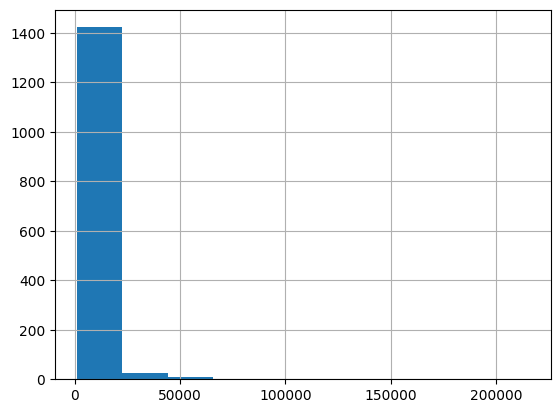

MasVnrArea


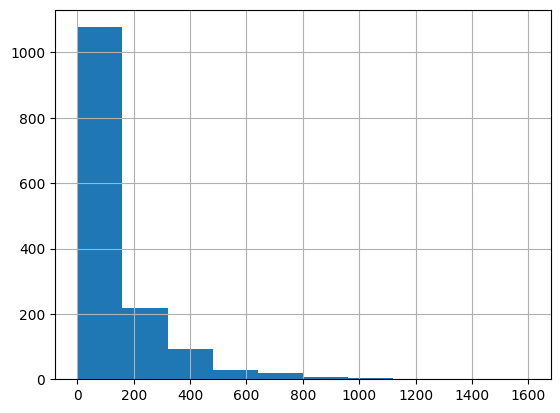

BsmtFinSF1


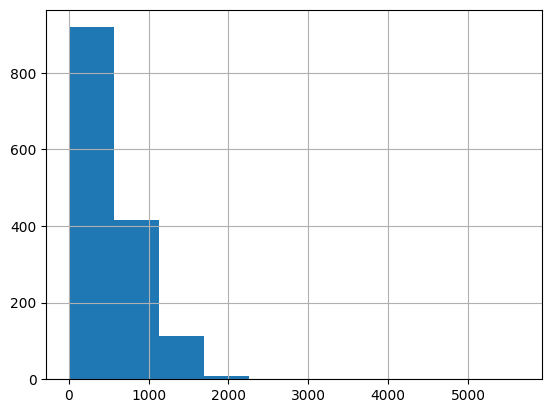

BsmtFinSF2


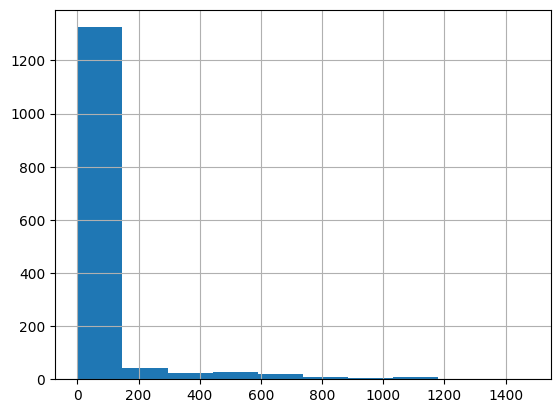

BsmtUnfSF


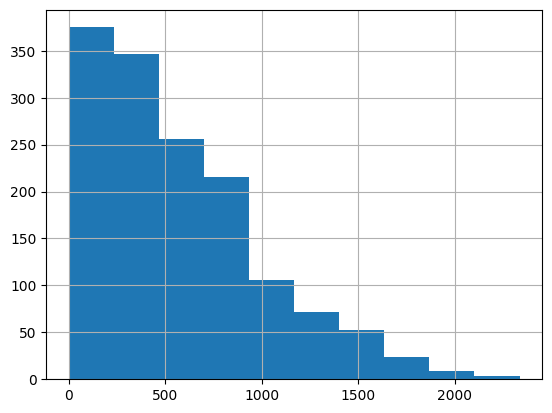

TotalBsmtSF


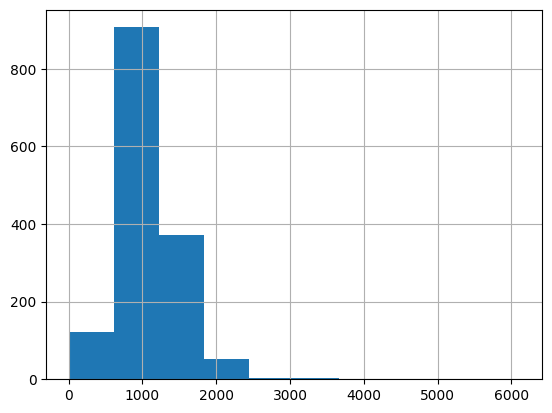

1stFlrSF


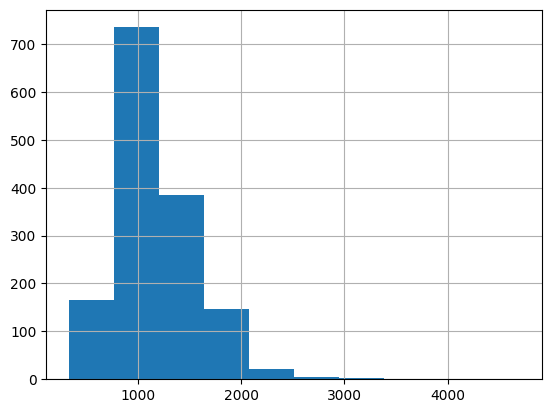

2ndFlrSF


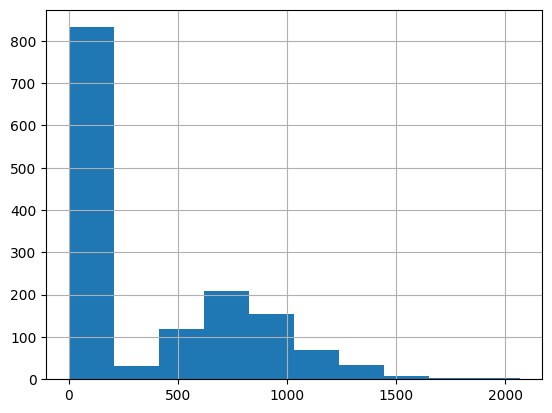

LowQualFinSF


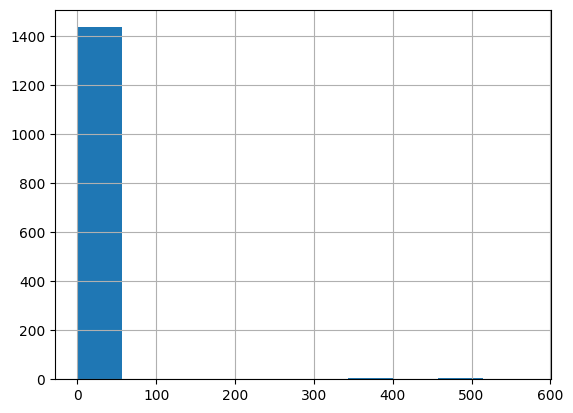

GrLivArea


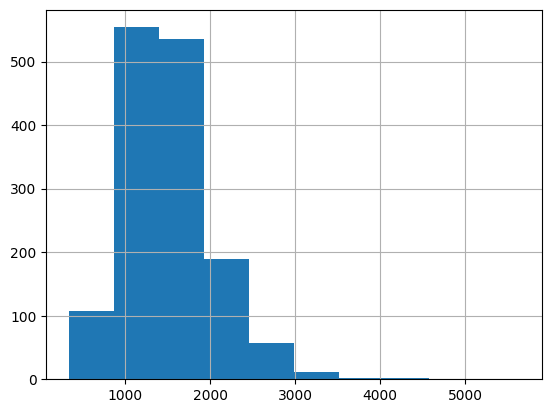

GarageArea


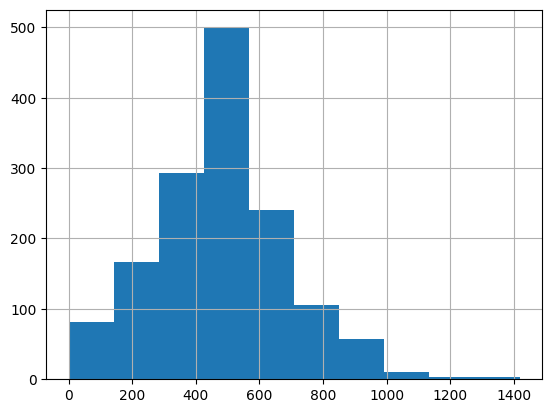

WoodDeckSF


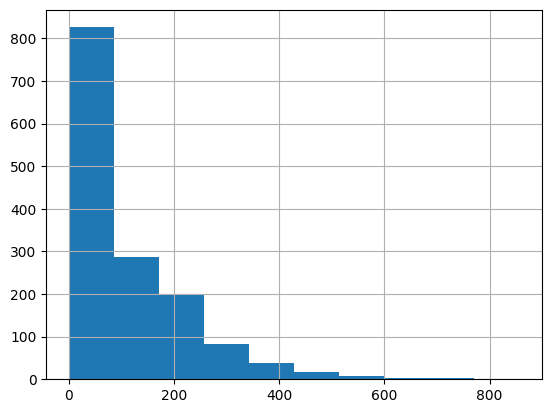

OpenPorchSF


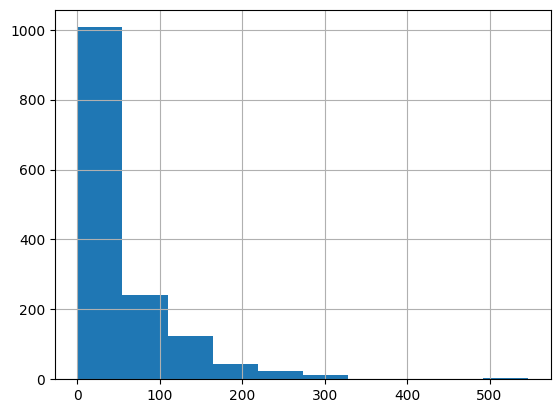

EnclosedPorch


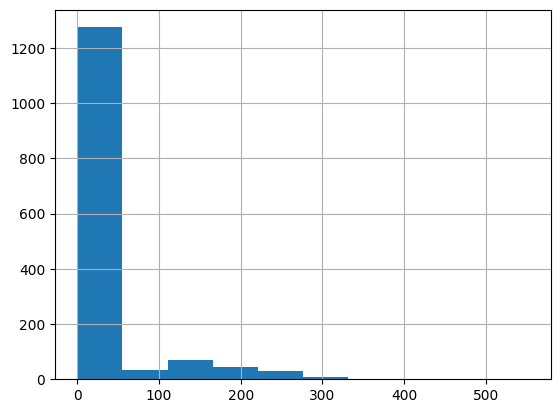

3SsnPorch


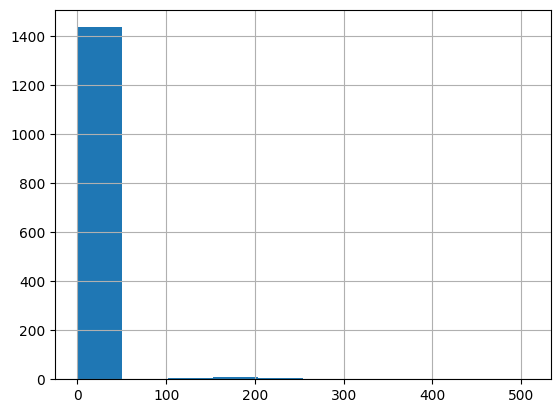

ScreenPorch


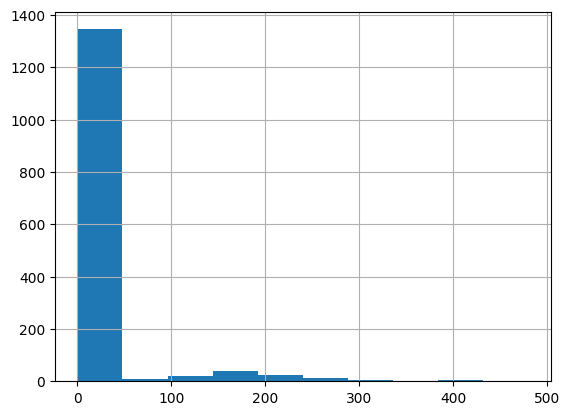

PoolArea


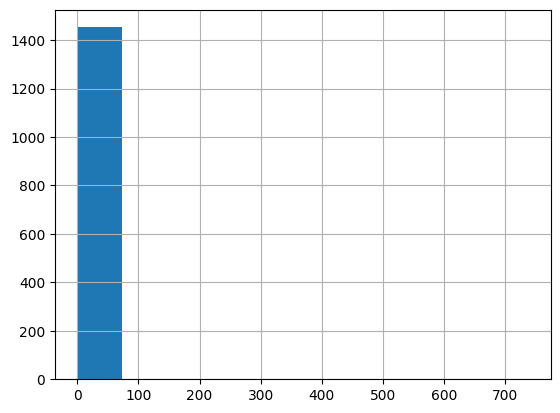

In [35]:
# Plotting the area features
for feature in area_features:
  print(feature)
  train_df[feature].hist()
  plt.show()

In [36]:
(train_df[area_features]<0).sum(axis=0)

LotArea          0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
dtype: int64

In [37]:
#Creating log features for the area features
for feature in area_features:
  train_df[feature+'_log']= np.log(train_df[feature] + 1)
  test_df[feature+'_log']= np.log(test_df[feature] + 1)

In [38]:
# Creating age features
age_features = [col for col in train_df.columns if 'Yr' in col or 'Year' in col]
age_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [39]:
# Second step, creating new features
for df in (train_df, test_df):
  df['sold_age']= df ['YrSold'] - df ['YearBuilt']
  df['remod_age']= df ['YrSold'] - df ['YearRemodAdd']
  df['garage_age']=  df ['YrSold'] - df ['GarageYrBlt']
  df['transaction_age']=  DATASET_YEAR - df ['YrSold']

In [40]:
train_df.shape

(1460, 102)

In [41]:
features = train_df.drop(columns=list(categorical_features)+['Id', target_column]).columns
features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'LotArea_log', 'MasVnrArea_log', 'BsmtFinSF1_log',
       'BsmtFinSF2_log', 'BsmtUnfSF_log', 'TotalBsmtSF_log', '1stFlrSF_log',
       '2ndFlrSF_log', 'LowQualFinSF_log', 'GrLivArea_log', 'GarageArea_log',
       'WoodDeckSF_log', 'OpenPorchSF_log', 'EnclosedPorch_log',
       '3SsnPorch_log', 'ScreenPorch_log', 'PoolArea_log', 'sold_age',
       'remod_age', 'garage_age', 'transaction_age'],
      dtype='object')

In [42]:
# Dropping the missing values
na_columns = train_df.isna().sum(axis=0)
na_columns[na_columns!=0]

LotFrontage        259
Alley             1369
MasVnrType         872
MasVnrArea           8
BsmtQual            37
BsmtCond            37
BsmtExposure        38
BsmtFinType1        37
BsmtFinType2        38
Electrical           1
FireplaceQu        690
GarageType          81
GarageYrBlt         81
GarageFinish        81
GarageQual          81
GarageCond          81
PoolQC            1453
Fence             1179
MiscFeature       1406
MasVnrArea_log       8
garage_age          81
dtype: int64

In [43]:
na_columns[na_columns!=0].index

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature', 'MasVnrArea_log', 'garage_age'],
      dtype='object')

In [44]:
na_test = test_df[features].isna().sum(axis=0)
missing_in_test_features = na_test[na_test>0].index

In [45]:
train_df = train_df.dropna(axis = 1)

In [46]:
features = [col for col in train_df.columns if col not in ('Id', target_column) and col not in categorical_features and col not in missing_in_test_features ]
features

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'LotArea_log',
 '1stFlrSF_log',
 '2ndFlrSF_log',
 'LowQualFinSF_log',
 'GrLivArea_log',
 'WoodDeckSF_log',
 'OpenPorchSF_log',
 'EnclosedPorch_log',
 '3SsnPorch_log',
 'ScreenPorch_log',
 'PoolArea_log',
 'sold_age',
 'remod_age',
 'transaction_age']

In [47]:
#Visualizing our features
train_df[features]

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,GrLivArea_log,WoodDeckSF_log,OpenPorchSF_log,EnclosedPorch_log,3SsnPorch_log,ScreenPorch_log,PoolArea_log,sold_age,remod_age,transaction_age
0,60,8450,7,5,2003,2003,856,854,0,1710,...,7.444833,0.000000,4.127134,0.000000,0.0,0.0,0.0,5,5,2
1,20,9600,6,8,1976,1976,1262,0,0,1262,...,7.141245,5.700444,0.000000,0.000000,0.0,0.0,0.0,31,31,3
2,60,11250,7,5,2001,2002,920,866,0,1786,...,7.488294,0.000000,3.761200,0.000000,0.0,0.0,0.0,7,6,2
3,70,9550,7,5,1915,1970,961,756,0,1717,...,7.448916,0.000000,3.583519,5.609472,0.0,0.0,0.0,91,36,4
4,60,14260,8,5,2000,2000,1145,1053,0,2198,...,7.695758,5.262690,4.442651,0.000000,0.0,0.0,0.0,8,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,953,694,0,1647,...,7.407318,0.000000,3.713572,0.000000,0.0,0.0,0.0,8,7,3
1456,20,13175,6,6,1978,1988,2073,0,0,2073,...,7.637234,5.857933,0.000000,0.000000,0.0,0.0,0.0,32,22,0
1457,70,9042,7,9,1941,2006,1188,1152,0,2340,...,7.758333,0.000000,4.110874,0.000000,0.0,0.0,0.0,69,4,0
1458,20,9717,5,6,1950,1996,1078,0,0,1078,...,6.983790,5.905362,0.000000,4.727388,0.0,0.0,0.0,60,14,0


In [48]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# Modèles
linear_model = LinearRegression()
lasso_model = Lasso()
ridge_model = Ridge()
Elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.7)
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='squared_error')
RfR = RandomForestRegressor(n_estimators=100, random_state=0)


for idx_train, idx_val in kf.split(train_df):

    X_train = train_df.loc[idx_train, features]
    y_train = train_df.loc[idx_train, target_column]
    X_val = train_df.loc[idx_val, features]
    y_val = train_df.loc[idx_val, target_column]
    
    
    models = {
        "Linear": linear_model,
        "Lasso": lasso_model,
        "Ridge": ridge_model,
        "ElasticNet": Elastic_model,
        "Gradient Boosting": gbr,
        "RandomForest" : RfR
    }

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        try:
            score = mean_squared_log_error(y_val, y_pred)
        except ValueError:
            print(f"{model_name}: Erreur - y_pred contient des valeurs négatives.")
            continue
        print(f"{model_name} : {score:.4f}")

 


Linear : 0.0295


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.003e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


Lasso : 0.0295
Ridge : 0.0295


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.246e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


ElasticNet : 0.0300
Gradient Boosting : 0.0368
RandomForest : 0.0268
Linear : 0.0341


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.837e+11, tolerance: 7.213e+08
  model = cd_fast.enet_coordinate_descent(


Lasso : 0.0339
Ridge : 0.0317


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.495e+11, tolerance: 7.213e+08
  model = cd_fast.enet_coordinate_descent(


ElasticNet : 0.0291
Gradient Boosting : 0.0255
RandomForest : 0.0200
Linear : 0.0517


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.197e+11, tolerance: 7.595e+08
  model = cd_fast.enet_coordinate_descent(


Lasso : 0.0517
Ridge : 0.0508


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.523e+11, tolerance: 7.595e+08
  model = cd_fast.enet_coordinate_descent(


ElasticNet: Erreur - y_pred contient des valeurs négatives.
Gradient Boosting : 0.0409
RandomForest : 0.0374
Linear : 0.0480


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.353e+11, tolerance: 7.373e+08
  model = cd_fast.enet_coordinate_descent(


Lasso : 0.0481
Ridge : 0.0521


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.774e+11, tolerance: 7.373e+08
  model = cd_fast.enet_coordinate_descent(


ElasticNet : 0.0727
Gradient Boosting : 0.0391
RandomForest : 0.0245
Linear : 0.0437


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.322e+11, tolerance: 7.682e+08
  model = cd_fast.enet_coordinate_descent(


Lasso : 0.0432
Ridge : 0.0305


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.153e+11, tolerance: 7.682e+08
  model = cd_fast.enet_coordinate_descent(


ElasticNet : 0.0284
Gradient Boosting : 0.0219
RandomForest : 0.0161


In [49]:
#Cross validation
print('LinearRegression:', cross_val_score(linear_model, train_df[features], train_df[target_column], cv=kf, scoring='neg_mean_squared_log_error').mean())
print('Lasso:', cross_val_score(lasso_model, train_df[features], train_df[target_column], cv=kf, scoring='neg_mean_squared_log_error').mean())
print('Ridge:', cross_val_score(ridge_model, train_df[features], train_df[target_column], cv=kf, scoring='neg_mean_squared_log_error').mean())
print('ElasticNet:', cross_val_score(Elastic_model, train_df[features], train_df[target_column], cv=kf, scoring='neg_mean_squared_log_error').mean())
print('GradientBoosting:', cross_val_score(gbr, train_df[features], train_df[target_column], cv=kf, scoring='neg_mean_squared_log_error').mean())
print('RandomForest:', cross_val_score(RfR, train_df[features], train_df[target_column], cv=kf, scoring='neg_mean_squared_log_error').mean())



LinearRegression: -0.04138968260533095


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.003e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.837e+11, tolerance: 7.213e+08
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

Lasso: -0.04126126068507554
Ridge: -0.03893043777540656


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.246e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.495e+11, tolerance: 7.213e+08
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

ElasticNet: nan
GradientBoosting: -0.032847091232416595
RandomForest: -0.024951536756106278


In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Hyperparameters
param_dist = {
    'n_estimators': randint(100, 3000),
    'max_depth': [ 10, 20, 30],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
}

#Using a randomized search instead of a grid search because it is faster
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(), 
                                   param_distributions=param_dist, 
                                   n_iter=100, 
                                   cv=5, 
                                   scoring='neg_mean_squared_log_error', 
                                   random_state=42, 
                                   n_jobs=-1)

random_search.fit(X=train_df[features], y=train_df[target_column])

print("Meilleurs hyperparamètres trouvés :", random_search.best_params_)

Meilleurs hyperparamètres trouvés : {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1685}


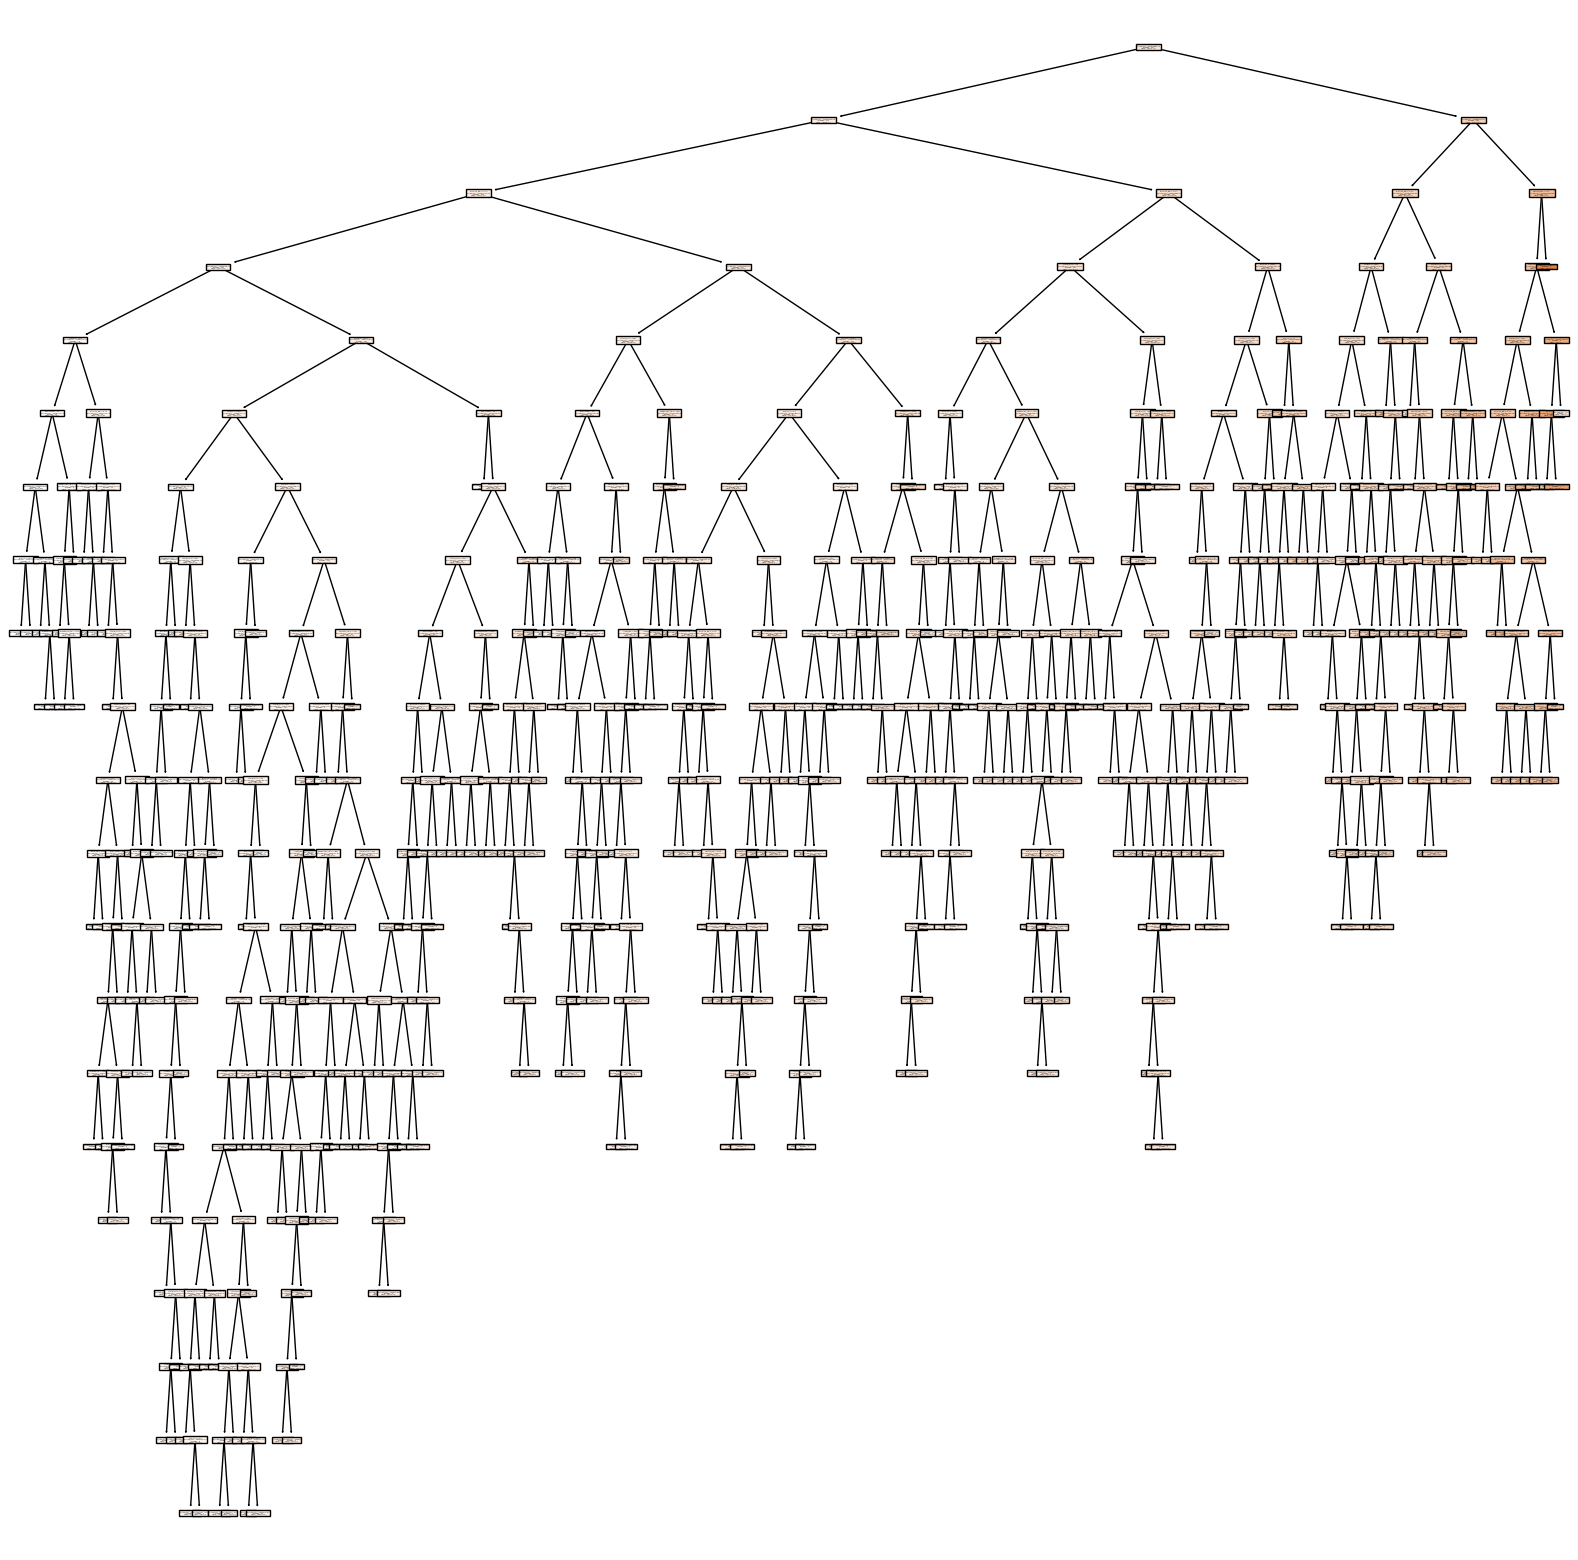

In [53]:
#Visualizing the random forest tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 20))
plot_tree(random_search.best_estimator_.estimators_[0], feature_names=features, filled=True)
plt.show()


In [54]:
pd.DataFrame(random_search.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
14,41.300724,0.932795,0.332141,0.039636,20,1,5,1685,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_...",-0.022150,-0.024945,-0.024119,-0.020026,-0.028046,-0.023857,0.002698,1
48,55.697292,0.227092,0.483416,0.100391,30,1,7,2427,"{'max_depth': 30, 'min_samples_leaf': 1, 'min_...",-0.022377,-0.024952,-0.024148,-0.020391,-0.027996,-0.023973,0.002552,2
65,66.753626,0.552378,0.581962,0.028253,20,2,3,2969,"{'max_depth': 20, 'min_samples_leaf': 2, 'min_...",-0.022465,-0.025103,-0.023875,-0.020237,-0.028530,-0.024042,0.002766,3
21,52.156310,0.417354,0.410629,0.025881,30,1,8,2668,"{'max_depth': 30, 'min_samples_leaf': 1, 'min_...",-0.022325,-0.025056,-0.024292,-0.020438,-0.028205,-0.024064,0.002621,4
96,74.902608,3.765628,0.462193,0.209605,10,1,2,2949,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",-0.022419,-0.025346,-0.024242,-0.020356,-0.028364,-0.024146,0.002705,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,13.235819,0.163091,0.121093,0.019252,10,9,7,895,"{'max_depth': 10, 'min_samples_leaf': 9, 'min_...",-0.024710,-0.027064,-0.026655,-0.024645,-0.029385,-0.026492,0.001750,96
31,17.823721,0.251838,0.162137,0.018203,30,9,16,1138,"{'max_depth': 30, 'min_samples_leaf': 9, 'min_...",-0.024810,-0.027051,-0.026712,-0.024559,-0.029398,-0.026506,0.001753,97
66,3.909389,0.102103,0.034981,0.002786,30,9,5,260,"{'max_depth': 30, 'min_samples_leaf': 9, 'min_...",-0.024866,-0.027220,-0.026575,-0.024499,-0.029428,-0.026518,0.001776,98
56,38.701139,0.422040,0.443280,0.134415,30,9,19,2298,"{'max_depth': 30, 'min_samples_leaf': 9, 'min_...",-0.024867,-0.027110,-0.026821,-0.024553,-0.029383,-0.026547,0.001746,99


In [55]:
random_search.predict(train_df[features])

array([204202.76886245, 173803.9674658 , 218216.71502901, ...,
       256383.1358961 , 136474.37255926, 149777.29919803])

In [57]:
#Downloading the submission file

y_hat_test = random_search.predict(X=test_df[features])

submission_df = pd.DataFrame({'Id': test_df['Id'], target_column: y_hat_test})
submission_df.to_csv('content/submission_pipeline_RandomForest.csv', index=False)

In [58]:
# Bonus: Using pipelines

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [60]:
from sklearn.ensemble import RandomForestRegressor

train_df = pd.read_csv('content/train.csv')
test_df = pd.read_csv('content/test.csv')

numerical_df = train_df.select_dtypes(include='number')
categorical_df = train_df.select_dtypes(exclude='number')

num_cols = [col for col in numerical_df.columns if col not in ('Id', target_column)]
cat_cols = list(categorical_df.columns)

num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale',MinMaxScaler())
])

cat_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot',OneHotEncoder(handle_unknown='ignore'))
])


col_trans = ColumnTransformer(transformers=[
    ('num_pipeline',num_pipeline,num_cols),
    ('cat_pipeline',cat_pipeline,cat_cols)
    ],
    remainder='drop',
    n_jobs=-1)

mlr= random_search.best_estimator_

reg_pipeline = Pipeline(steps=[
    ('col_trans', col_trans),
    ('model', mlr)
])

def custom_msle(y_true, y_pred):
  y_pred = np.clip(y_pred, 0, None)
  return mean_squared_log_error(y_true=y_true, y_pred=y_pred)

sklearn.model_selection.cross_val_score(estimator=reg_pipeline,
                                        X=train_df.drop(columns=['Id', target_column]),
                                        y=train_df[target_column],
                                        scoring=sklearn.metrics.make_scorer(custom_msle, greater_is_better=False)
                                        )

array([-0.01907804, -0.023655  , -0.02022628, -0.01880375, -0.02419079])

In [62]:
reg_pipeline

Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF...
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exterior2nd', 'MasVnrType',
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'BsmtQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', ...])])),
                ('model',
                 RandomForestRegressor(max_depth=20, min_samples_split=5,
                                       n_estimators=1685))])

In [63]:
train_df.drop(columns=['Id', target_column])

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [64]:
reg_pipeline.fit(X=train_df.drop(columns=['Id', target_column]), y=train_df[target_column])

Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF...
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exterior2nd', 'MasVnrType',
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'BsmtQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', ...])])),
                ('model',
                 RandomForestRegressor(max_depth=20, min_samples_split=5,
                                       n_estimators=1685))])

In [65]:
y_hat_test =reg_pipeline.predict(X=test_df.drop(columns=['Id']))